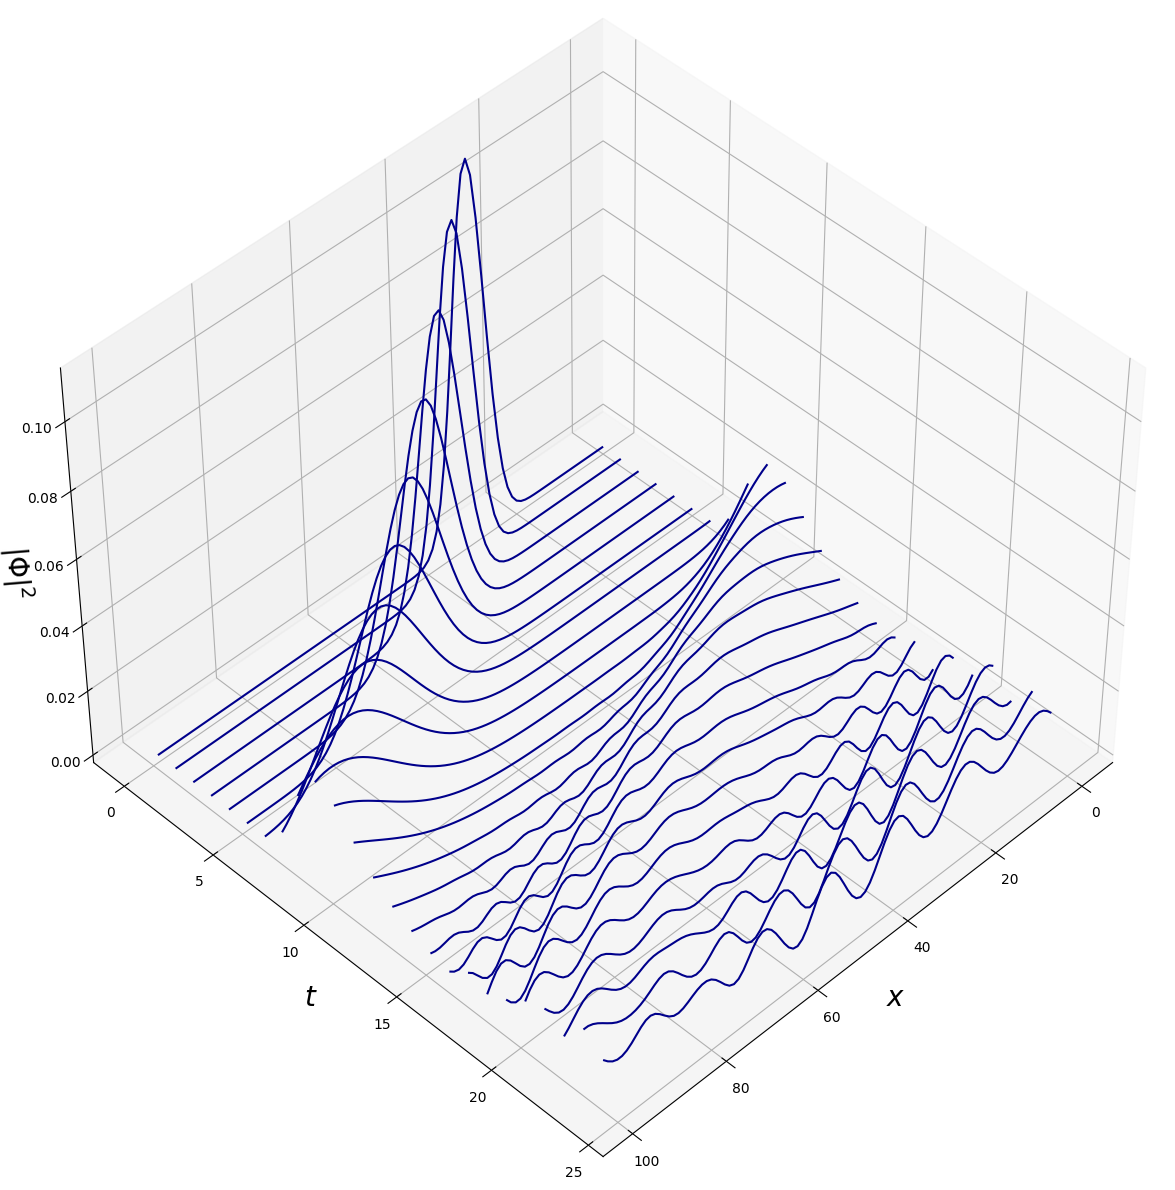

In [1]:
"""
Simulation of N-room quantum mechanics
"""

"""
周期的境界条件
"""

%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


pi = np.pi
nmax = 100
mtime = 1500

p = np.zeros(nmax, dtype="complex128")
q = np.zeros(nmax, dtype="complex128")
r = np.zeros(nmax, dtype="complex128")

# initial data
dx = 1

# calculation of hamiltonian
a = 1
dt = 0.1 / a
ha = np.zeros(nmax)
hb = np.full(nmax, -a)

#ポテンシャル追加

#for i in range(65,70):
    #ha[n] = 1

# set initial wave function
x0 = 0.3 * dx * nmax
sg = 0.05 * dx * nmax
pa = 0.1 * 2 * pi / dx

for n in range(nmax):
    x = n * dx
    p[n] = np.exp(-0.5 * (x - x0) ** 2 / sg**2) * np.exp(1j * pa * (x - x0))

# normalization of wave function
pa = 0.0
for n in range(nmax):
    pa = pa + np.abs(p[n]) ** 2
pa = np.sqrt(pa)
for n in range(nmax):
    p[n] = p[n] / pa
    
# second wave function
r[0] = -1j * dt * (ha[0] * p[0] + hb[0] * p[1] + hb[nmax - 1] * p[nmax - 1])
for n in range(1, nmax - 1):
    r[n] = -1j * dt * (hb[n - 1] * p[n - 1] + ha[n] * p[n] + hb[n] * p[n + 1])
r[nmax - 1] = -1j * dt * (hb[nmax - 2] * p[nmax - 2] + ha[nmax - 1] * p[nmax - 1] + hb[nmax - 1] * p[0])

for n in range(nmax):
    q[n] = p[n] + r[n]
q[0] = q[0] - 0.5 * 1j * dt * (ha[0] * r[0] + hb[0] * r[1] + hb[nmax - 1] * r[nmax - 1])
for n in range(1, nmax - 1):
    q[n] = q[n] - 0.5 * 1j * dt * (
        hb[n - 1] * r[n - 1] + ha[n] * r[n] + hb[n] * r[n + 1]
    )
q[nmax - 1] = q[nmax - 1] - 0.5 * 1j * dt * (
    hb[nmax - 2] * r[nmax - 2] + ha[nmax - 1] * r[nmax - 1] + hb[nmax - 1] * r[0]
)

# time evolution loop
t_N = mtime // 60
q_data = np.zeros((t_N, nmax))

for itime in range(0, mtime, 3):
    t = dt * itime
    
    # output wave function 
    t_i = itime // 60
    if (itime % 60) == 0:
        q_data[t_i] = np.abs(q) ** 2
        
    # time evolution
    r[0] = -2 * 1j * dt * (ha[0] * q[0] + hb[0] * q[1] + hb[nmax - 1] * q[nmax -1]) + p[0]
    for n in range(1, nmax - 1):
        r[n] = (
            -2 * 1j * dt * (hb[n - 1] * q[n - 1] + ha[n] * q[n] + hb[n] * q[n + 1])
            + p[n]
        )
        r[nmax - 1] = (
            -2 * 1j * dt * (hb[nmax - 2] * q[nmax - 2] + ha[nmax - 1] * q[nmax - 1] + hb[nmax - 1] * q[0])
        + p[nmax - 1]
    )
        
    p[0] = -2 * 1j * dt * (ha[0] * r[0] + hb[0] * r[1] + hb[nmax - 1] * r[nmax -1]) + q[0]
    for n in range(1, nmax - 1):
        p[n] = (
            -2 * 1j * dt * (hb[n - 1] * r[n - 1] + ha[n] * r[n] + hb[n] * r[n + 1])
            + q[n]
        )
    p[nmax - 1] = (
        -2 * 1j * dt * (hb[nmax - 2] * r[nmax - 2] + ha[nmax - 1] * r[nmax - 1] + hb[nmax - 1] * r[0])
        + q[nmax - 1]
    )

    q[0] = -2 * 1j * dt * (ha[0] * p[0] + hb[0] * p[1] + hb[nmax - 1] * p[nmax - 1]) + r[0]
    for n in range(1, nmax - 1):
        q[n] = (
            -2 * 1j * dt * (hb[n - 1] * p[n - 1] + ha[n] * p[n] + hb[n] * p[n + 1])
            + r[n]
        )
    q[nmax - 1] = (
        -2 * 1j * dt * (hb[nmax - 2] * p[nmax - 2] + ha[nmax - 1] * p[nmax - 1] + hb[nmax - 1] * p[0])
        + r[nmax - 1]
    )

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(projection='3d')    
x = np.arange(nmax)
t = np.arange(t_N)
xx, tt = np.meshgrid(x, t)
ax.plot_wireframe(xx, tt, q_data, cstride = 0, rstride = 1, color = 'darkblue')
ax.set_xlabel('$x$', fontsize = 20)
ax.set_ylabel('$t$', fontsize = 20)
ax.set_zlabel('$|Φ|^2$', fontsize = 20)
ax.view_init(elev = 45, azim = 45)

plt.show()